## Geely Automotive Pricing Model
**By : Monil Panchal**

### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

#### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 1. Reading and understanding the data

In [5]:
data = pd.read_csv('cardata.csv')

In [6]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
data.shape

(205, 26)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

We can see from the info table that there is 
1. object = 10
2. Integer = 8
3. Float = 8

In [9]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
# dropping car_id as it is not relevant
data.drop('car_ID', axis = 1, inplace=True)

In [11]:
#Extracting Company name from Car name
data['CompanyName'] = data['CarName'].apply(lambda x : x.split(' ')[0])
data.drop(['CarName'],axis=1,inplace=True)
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [12]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

We find that there are spelling mistake in the CompanyName Like 'maxda' to 'mazda' so likwise we correct all that spelling mistake

In [13]:
data.CompanyName = data.CompanyName.str.lower()

data.CompanyName.replace('maxda','mazda',inplace=True)
data.CompanyName.replace('porcshce','porsche',inplace=True)
data.CompanyName.replace('toyouta','toyota',inplace=True)
data.CompanyName.replace('vokswagen','volkswagen',inplace=True)
data.CompanyName.replace('vw','volkswagen',inplace=True)

data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

- There is no null value present in the data

### 2. Data Visualization

#### Uni variate Analysis

#### For categorical Data

gas       185
diesel     20
Name: fueltype, dtype: int64


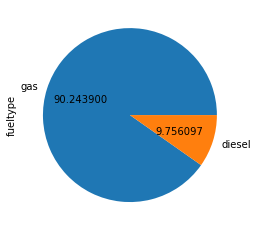

In [14]:
print(data['fueltype'].value_counts())
data['fueltype'].value_counts().plot(kind = 'pie', autopct = '%2f')
plt.show()

front    202
rear       3
Name: enginelocation, dtype: int64


[]

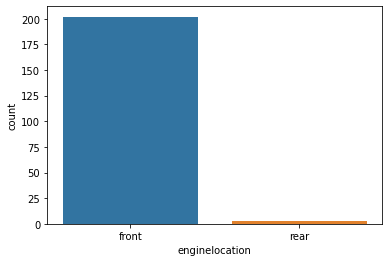

In [15]:
print(data['enginelocation'].value_counts())
sns.countplot(data['enginelocation'])
plt.plot()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


[]

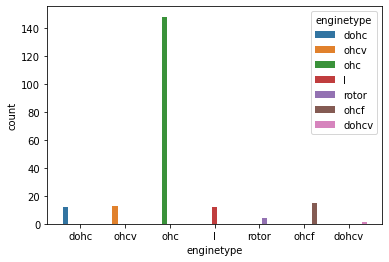

In [16]:
print(data['enginetype'].value_counts())
sns.countplot(data['enginetype'], hue = data['enginetype'])
plt.plot()

In [17]:
print(data['fuelsystem'].value_counts())

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


[]

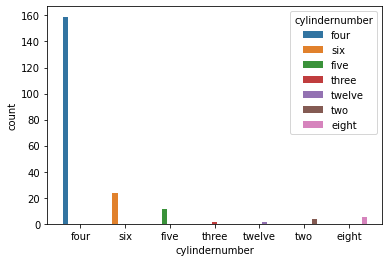

In [18]:
print(data['cylindernumber'].value_counts())
sns.countplot(data['cylindernumber'], hue = data['cylindernumber'])
plt.plot()

In [19]:
data['symboling'] = data['symboling'].map({-3: 'safe', -2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

In [20]:
data.head()


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,moderate,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,risky,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,risky,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [21]:
print(data['symboling'].value_counts())

moderate    121
risky        59
safe         25
Name: symboling, dtype: int64


#### Summary
- We find that 90% of the car has "GAS" as a fueltype.
- Almost all car has engine located in the front.
- Majority of the car has "ohc" enginetype.
- Maximuem number of car has 4 cylinder and one car has 12 cylinder.

#### Numerical data

[]

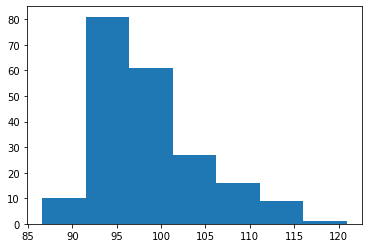

In [22]:
plt.hist(data['wheelbase'], bins = 7)
plt.plot()

[]

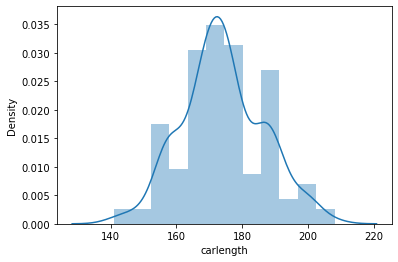

In [23]:
sns.distplot(data['carlength'])
plt.plot()

[]

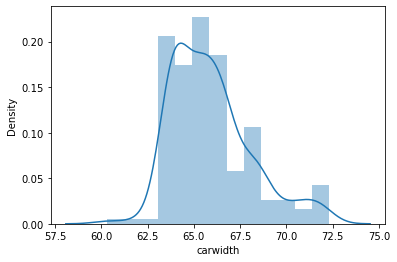

In [24]:
sns.distplot(data['carwidth'])
plt.plot()

[]

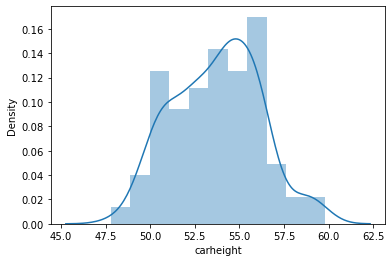

In [25]:
sns.distplot(data['carheight'])
plt.plot()

[]

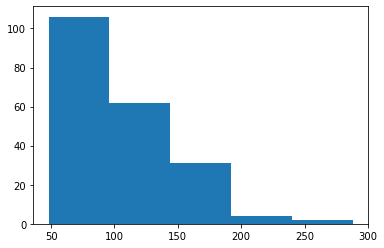

In [26]:
plt.hist(data['horsepower'], bins = 5)
plt.plot()

#### Summary
- Majority of wheelbase is between 92 to 105.
- Most of the horse power are in range of 50 to 150.

### Multivariate analysis

[]

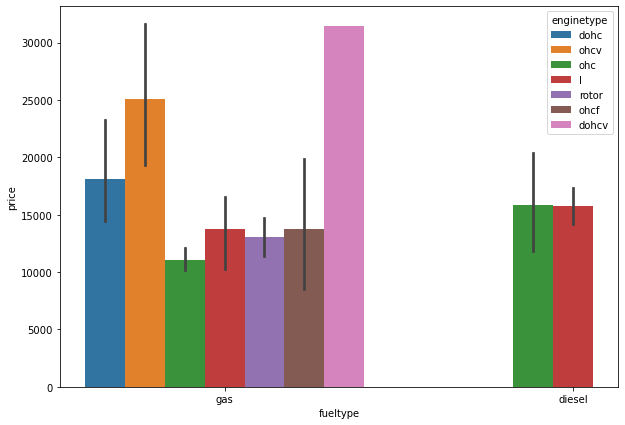

In [27]:
plt.figure(figsize=(10, 7))
sns.barplot(data['fueltype'], data['price'], hue = data['enginetype'])
plt.plot()

- Diseal has only two type of engine "ohc" & "l"
- "dohcv" engine has heighest price gas type and lowest price in "ohc"

[]

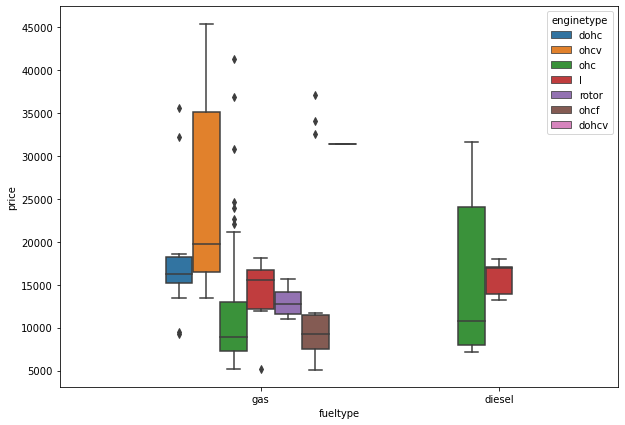

In [28]:
plt.figure(figsize=(10, 7))
sns.boxplot(data['fueltype'], data['price'], hue = data['enginetype'])
plt.plot()

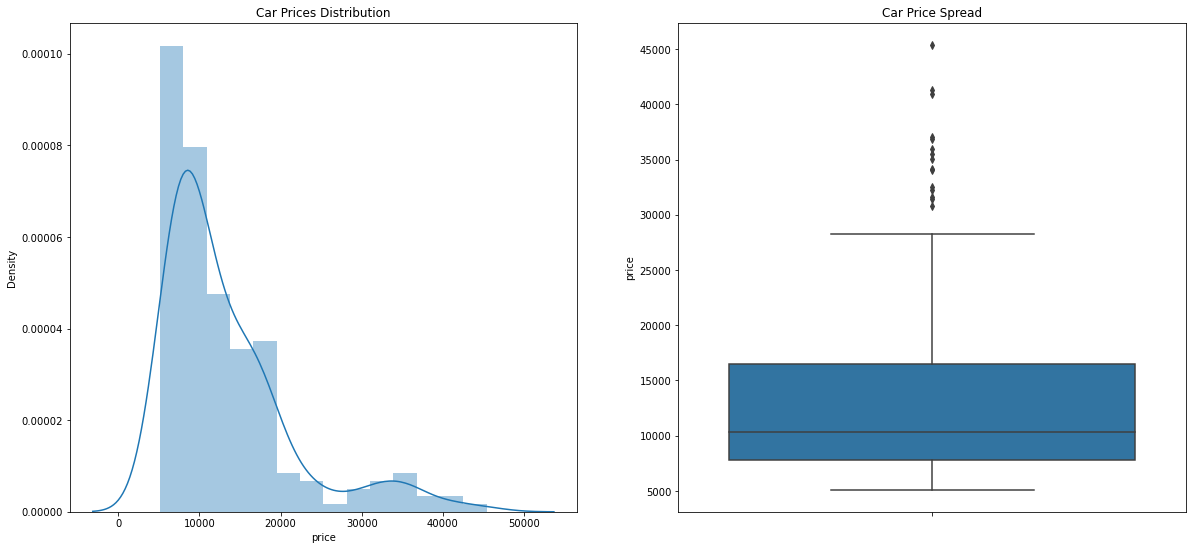

In [29]:
plt.figure(figsize=(20,9))

plt.subplot(1,2,1)
plt.title('Car Prices Distribution')
sns.distplot(data.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data.price)

plt.show()

- Price has so far spread from the mean which indicate high variance in the car price.
- Form the dist plot we can see that most of the price is in lower range.
- So we can remove the outliears from it.

In [30]:
# removing the outliers
data = data[np.abs(data.price - data.price.mean()) <= (3*data.price.std())]

In [31]:
data.shape

(202, 25)

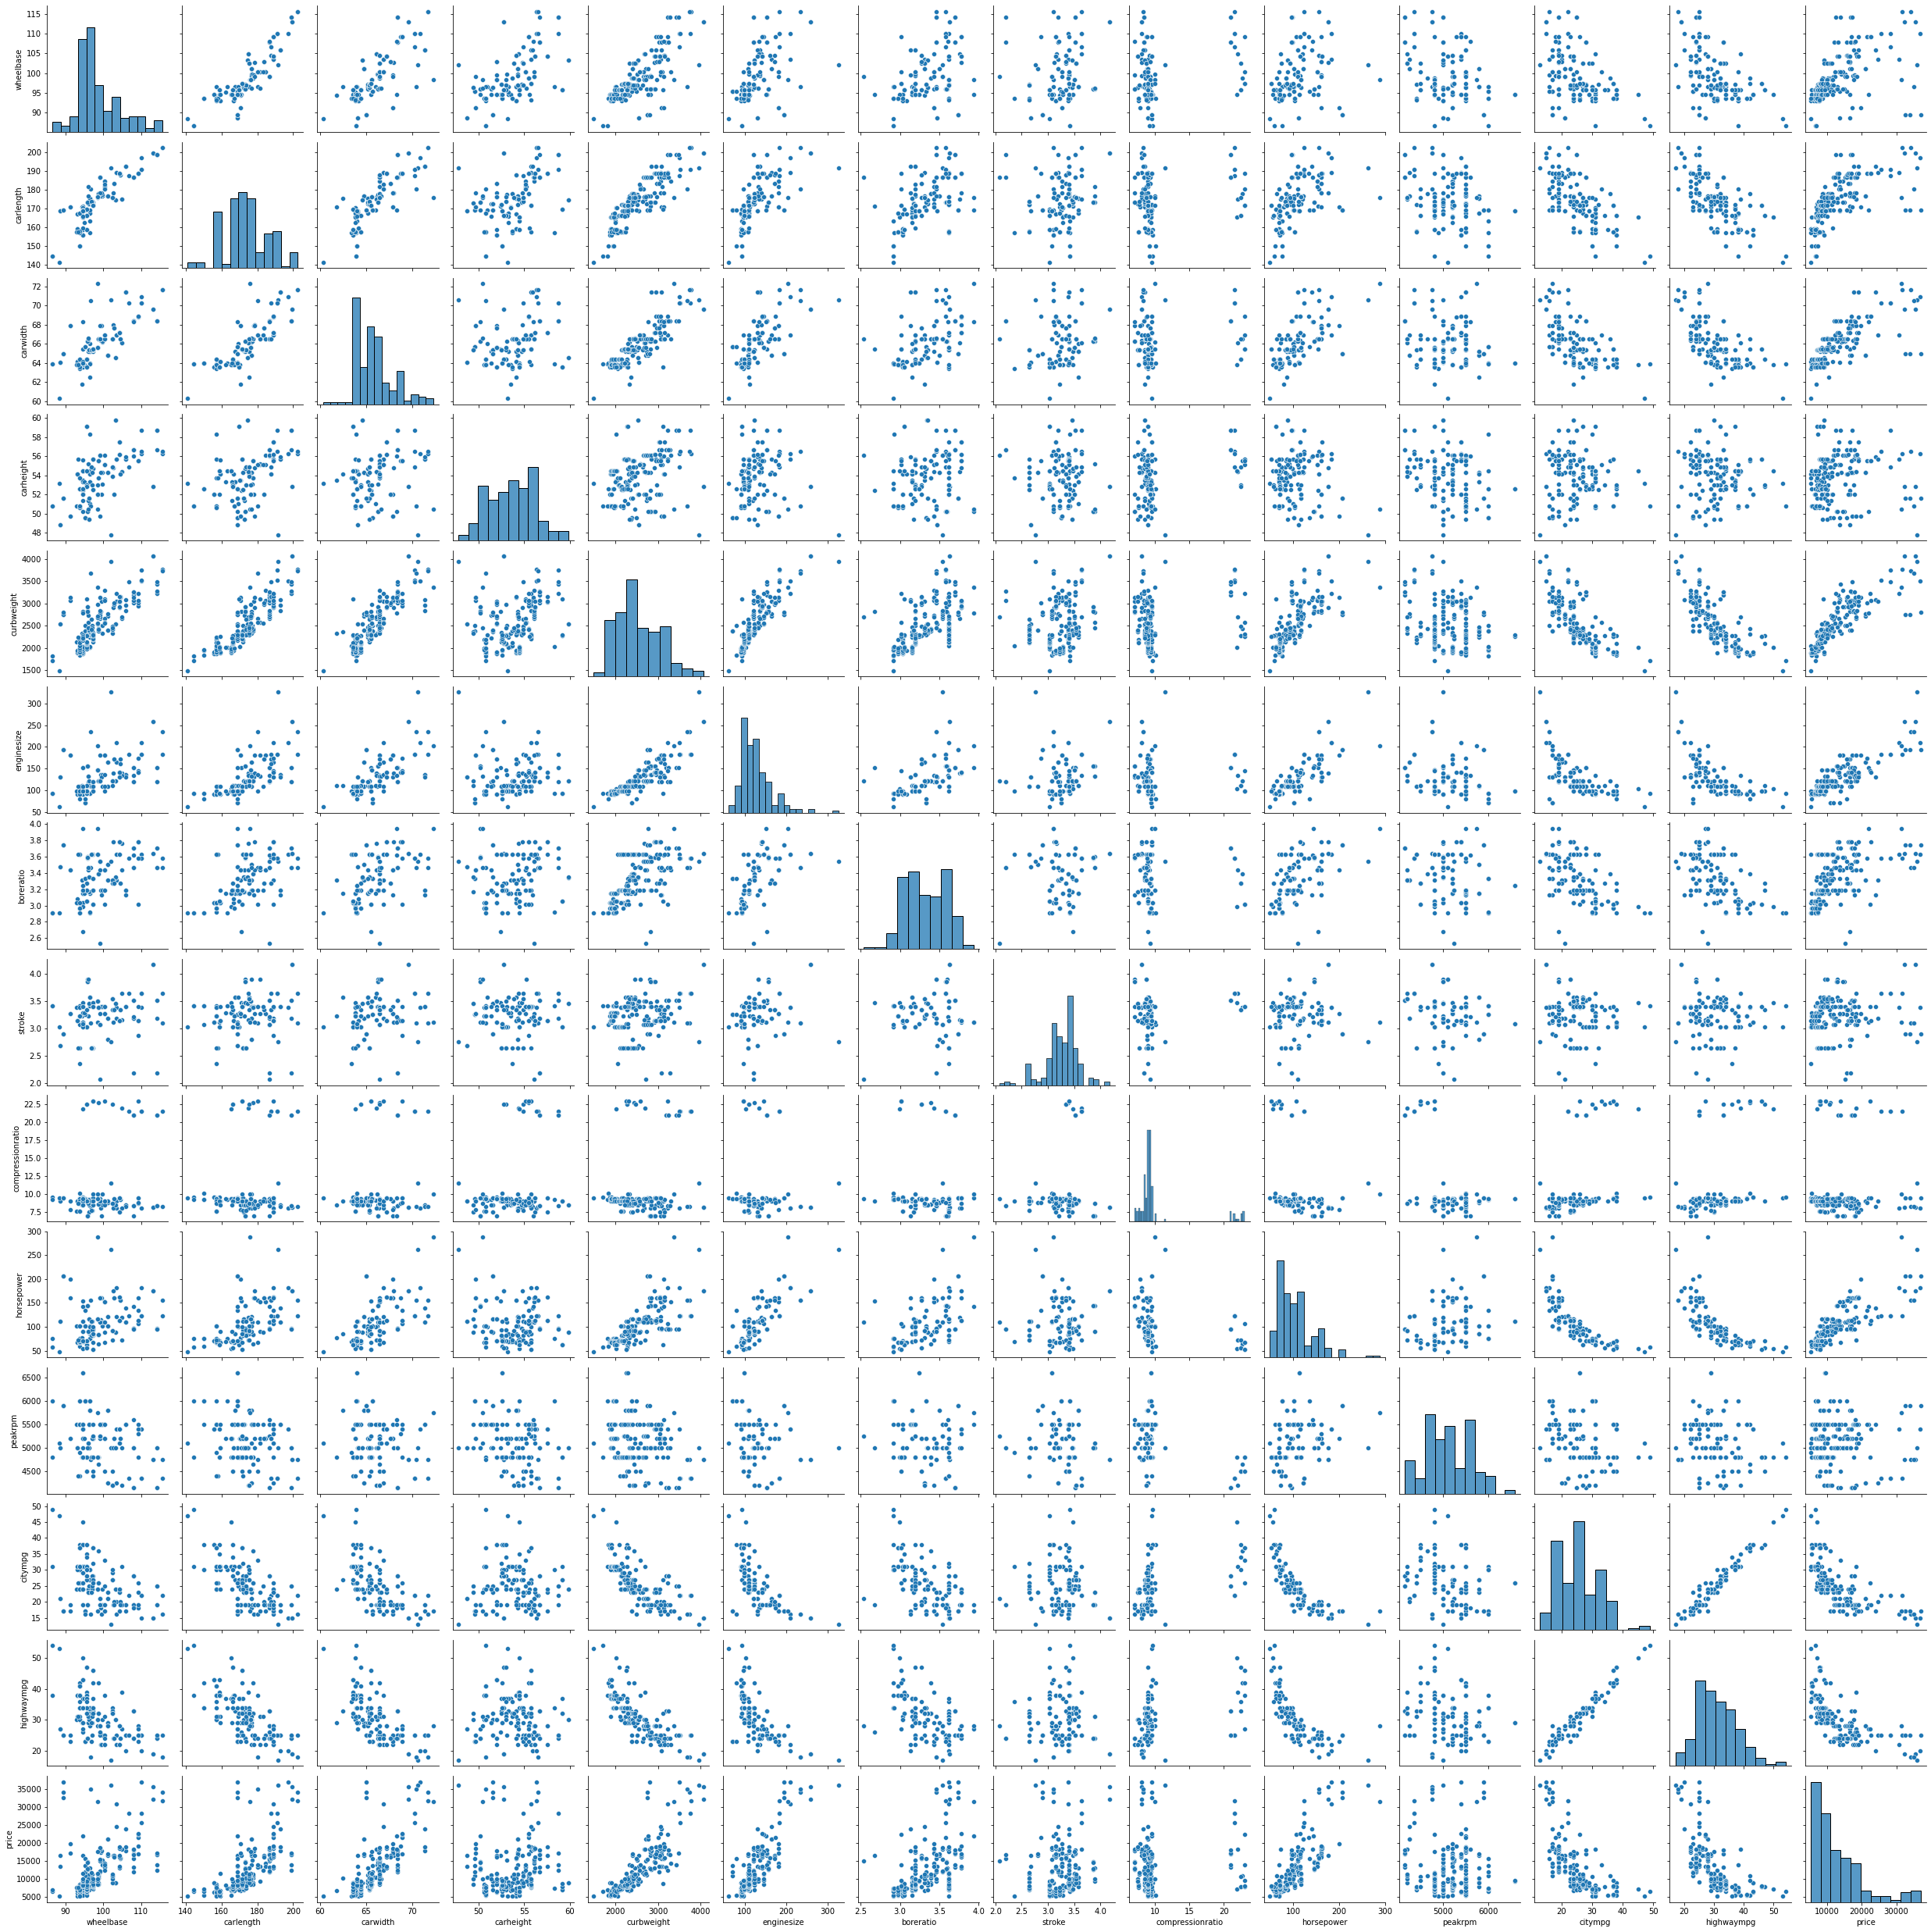

In [32]:
sns.pairplot(data)
plt.show()

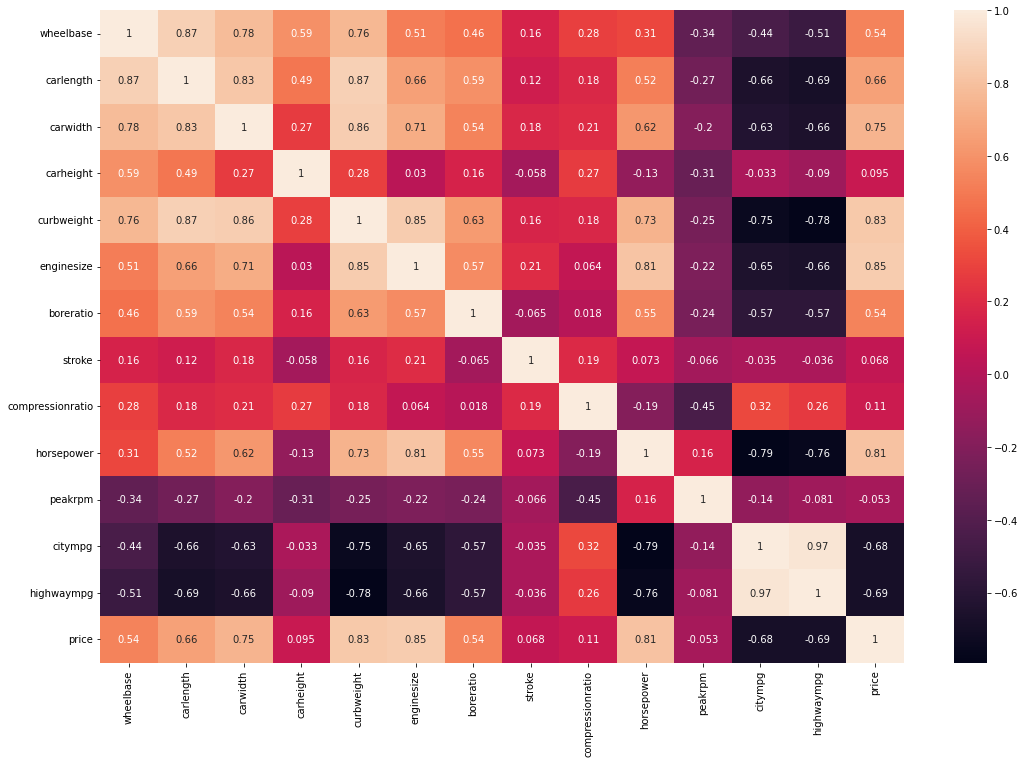

In [33]:
# Heat map
plt.figure(figsize = (18, 12))
cor = data.corr()
sns.heatmap(cor, annot = True)
plt.show()

- From pair plot and Heat Map we can find that how different variable are correlate to each other.
- Like `citympg` and `highwaympg` has negetive correlation with `price`.
- Also `enginesize`, `curbweight`, `carwidth`,`horsepower` have solid positive relationship with `price`.
- also `citympt` and `highwaympg` has significant positive relationship with eachother.

###### We can also see so many multycolinearity present in the variable
- `Wheelbase`, `carlength`, `curbweight` to each other.
- `citympg`, `highwaympg` have negetive multicolearrity with horsepower.

#### For categorical variable

In [34]:
cat_var = list(data.columns[data.dtypes == 'object'])
cat_var

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'CompanyName']

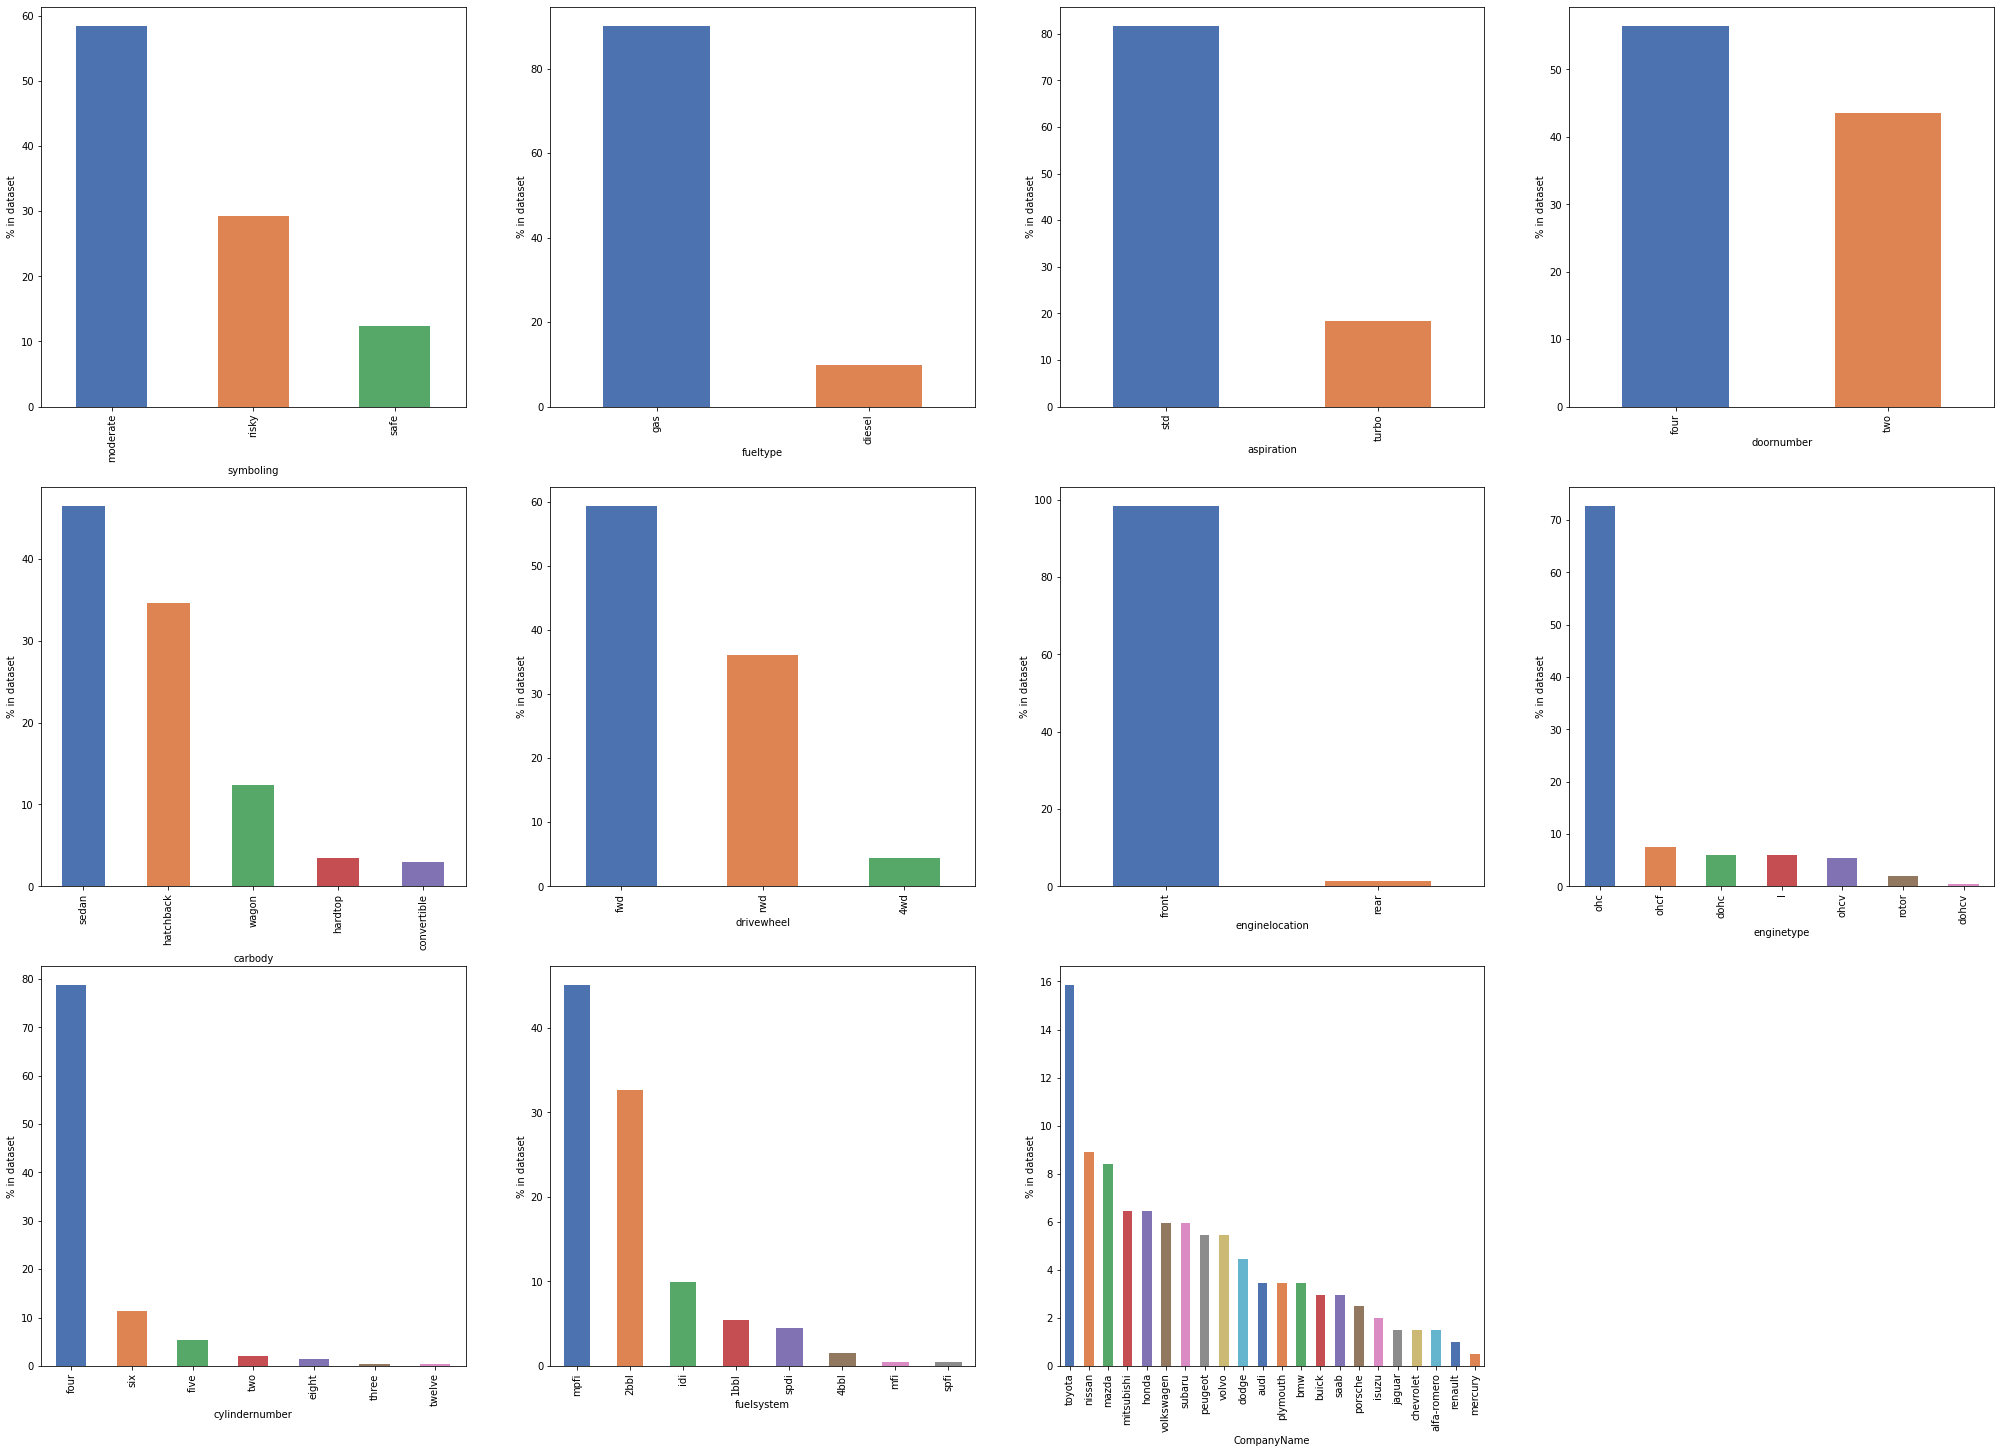

In [35]:
# plotting percentage of cars with respect to different categorical feature.
plt.figure(figsize=(35, 25))
for var in cat_var:
    plt.subplot(3,4,cat_var.index(var)+1)
    values = (data[var].value_counts(normalize=True)*100)
    plt_s = values.plot.bar(color=sns.color_palette('deep'))
    plt_s.set(xlabel = var, ylabel = '% in dataset')

##### Summary
- Most of the car have modrate symboling.
- majorities of car have 4 door but also lot of car has 2 door.
- Approx 45 to 48% cars are sydan and 35% of cars are hachback.
- Toyota company share approx 16% of all company.
- majorities of engines are `ohc` type.
- most of the car have four cylinder.

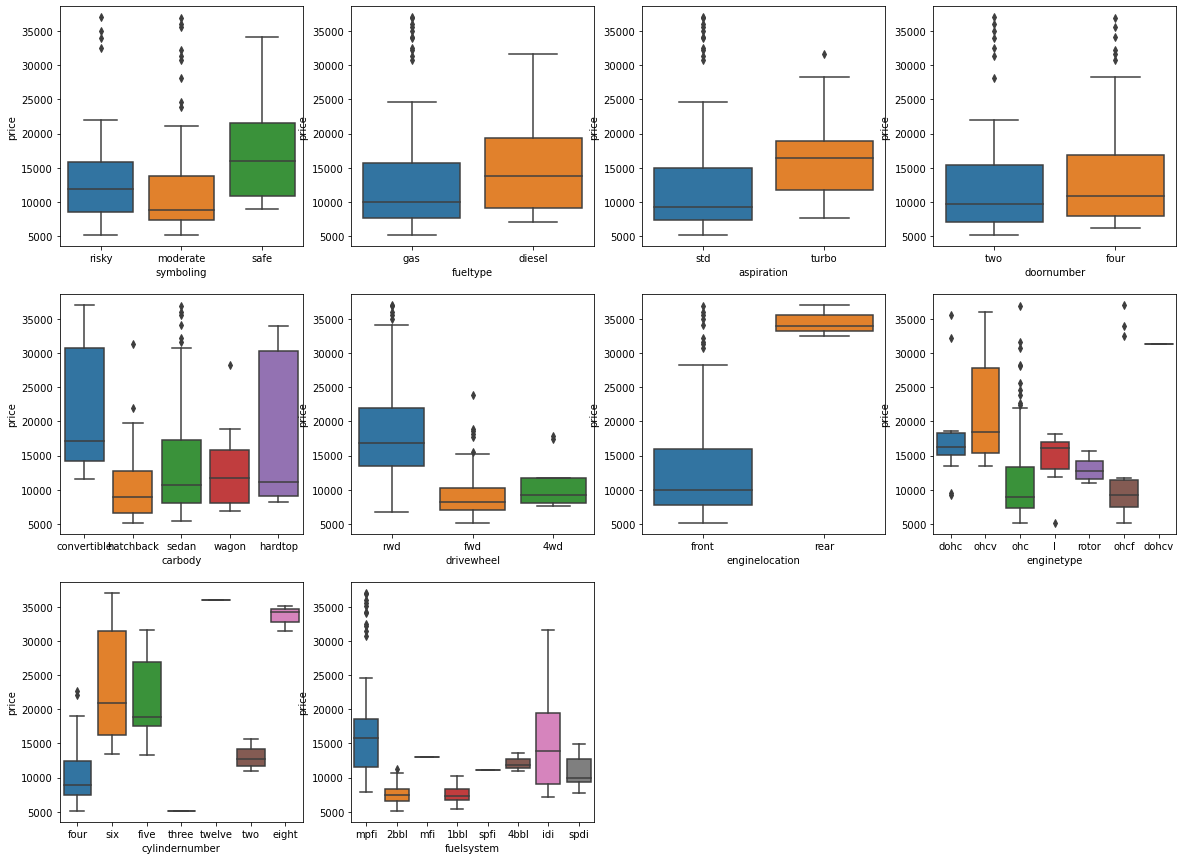

In [36]:
# Now plotting car features again car `price`
plt.figure(figsize=(20, 15))
for var in cat_var[:-1]:
    plt.subplot(3,4,cat_var.index(var)+1)
    sns.boxplot(x = var, y = 'price', data = data)
plt.show()

##### Summary
- Car with safe symboling tend to have a higher price.
- Fuletype, aspiration seems to have effects on car price.
- Doornumber dose not have much effect on car price..
- convertable have significant higher price and also same case with the hardtop but it has lower meadian
- Also ohcv engine cars price is significantly higher.

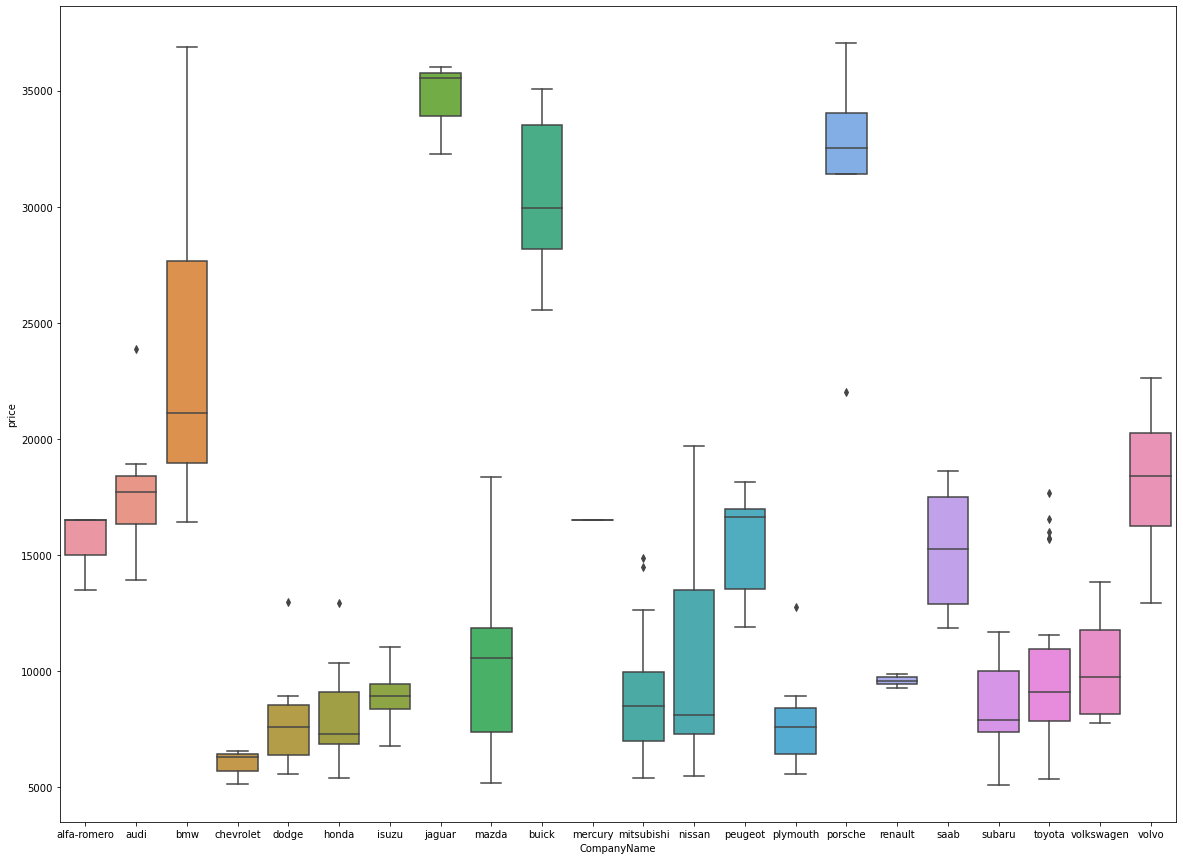

In [37]:
## for company name
plt.figure(figsize = (20, 15))
sns.boxplot(x = 'CompanyName', y = 'price', data = data)
plt.show()

In [38]:
print("Average car price : ", data['price'].mean())
print(data.groupby('CompanyName').price.mean().sort_values(ascending = False))

Average car price :  12841.834985148515
CompanyName
jaguar         34600.000000
porsche        31400.500000
buick          30469.333333
bmw            23947.857143
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64


- Jaguar, porsche, buick, bmw and volvo have higher average price.
- We can see that the overall average price of all company is around 13000$

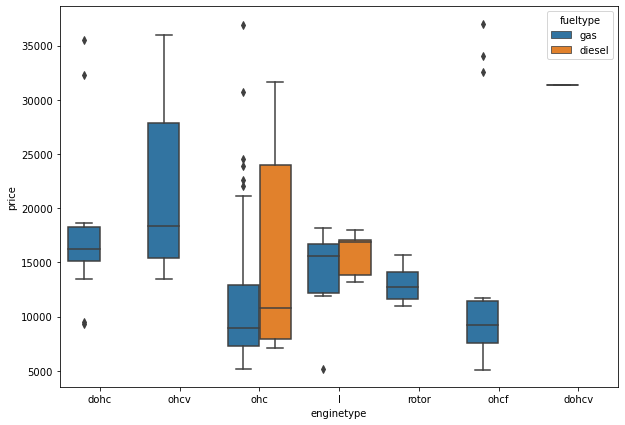

In [39]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'enginetype', y = 'price', hue = 'fueltype', data = data )
plt.show()

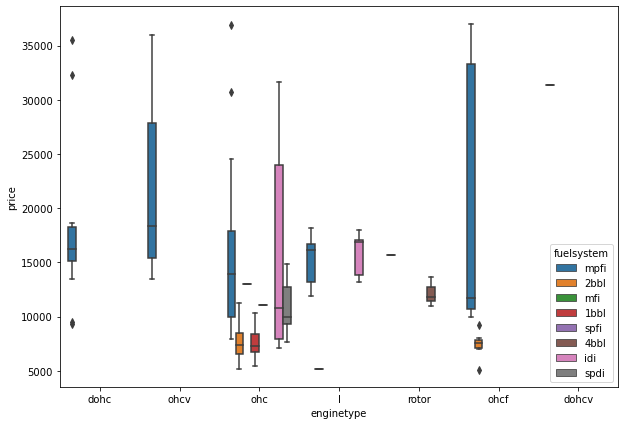

In [40]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'enginetype', y = 'price', hue = 'fuelsystem', data = data )
plt.show()

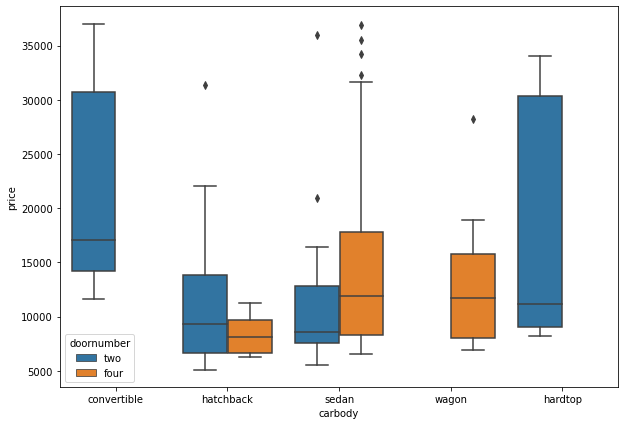

In [41]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'carbody', y = 'price', hue = 'doornumber', data = data )
plt.show()

- only two engine type has fuel type as diesel which also tend to be higher in price.
- Most of the engine type has mpfi fuelsystem which is also contribute to the higher price.
- wagon always has four doors.

#### Deriving new features and visualization

From heatmap we find that `citympg` and `highwaympg` are highly corrlated, so we create a new variable fuel efficency based on these two. We assume that the efficiency depends more on the citympg

In [42]:
data['fuelEfficiency'] = (0.55 * data['citympg']) + (0.45 * data['highwaympg'])
# dropping that collumn
data.drop(['highwaympg', 'citympg'], axis = 1, inplace=True)

In [43]:
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,CompanyName,fuelEfficiency
0,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,23.70
1,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,23.70
2,moderate,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,alfa-romero,22.15
3,risky,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,audi,26.70
4,risky,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,audi,19.80


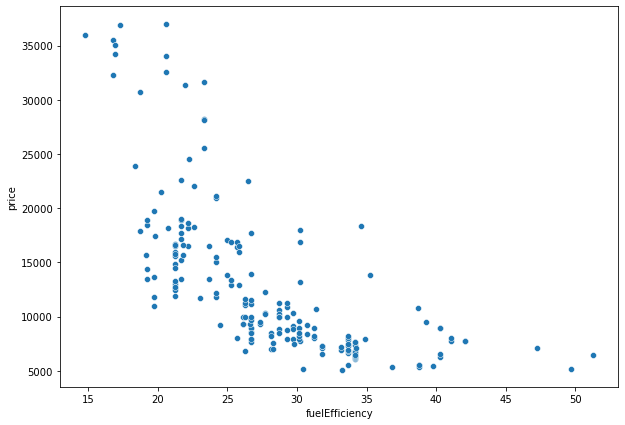

In [44]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = 'fuelEfficiency', y = 'price', data = data)
plt.show()

We can see that with the increse in the fuelefficiency price is going to decrease means it is negetive correlation with the price as we see in the heatmap.

In [45]:
# now built a collumn that contain mean price of all companyName
meanPrices = data.groupby('CompanyName').price.mean().sort_values(ascending = False)
meanPrices

CompanyName
jaguar         34600.000000
porsche        31400.500000
buick          30469.333333
bmw            23947.857143
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

In [46]:
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,CompanyName,fuelEfficiency
0,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,23.70
1,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,23.70
2,moderate,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,alfa-romero,22.15
3,risky,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,audi,26.70
4,risky,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,audi,19.80


We are creating 3 bins for simplification.
- **Economy** = mean prices below 10000.
- **Medium** = mean prices between 10000 and 20000.
- **Highend** = mean prices greater than 20000.

In [47]:
# now creat the function for creating the bins from the mean prices.

def companyRange(CompanyName):
    if meanPrices[CompanyName] <= 10000:
        return 'Economy'
    elif meanPrices[CompanyName] <= 20000:
        return 'Medium'
    else:
        return 'Highend'
    
data['CompanyRanges'] = data['CompanyName'].apply(companyRange)
#Dropping original variable
data.drop(['CompanyName'], axis = 1, inplace = True)
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,fuelEfficiency,CompanyRanges
0,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.70,Medium
1,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.70,Medium
2,moderate,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.15,Medium
3,risky,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.70,Medium
4,risky,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.80,Medium


In [48]:
data.groupby('CompanyRanges').price.mean()

CompanyRanges
Economy     8893.252632
Highend    29107.309524
Medium     13231.839151
Name: price, dtype: float64

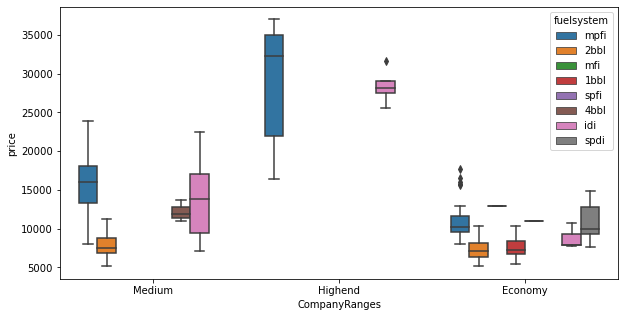

In [49]:
#plotting CompanyRange against price with diffrent colors for fuel systems
plt.figure(figsize = (10,5))
sns.boxplot(x = 'CompanyRanges', y = 'price', hue = 'fuelsystem', data = data)
plt.show()

- Highend cars have only mpfi and idi fuelsystems.
- Economic cars have so much varity in fuel system.

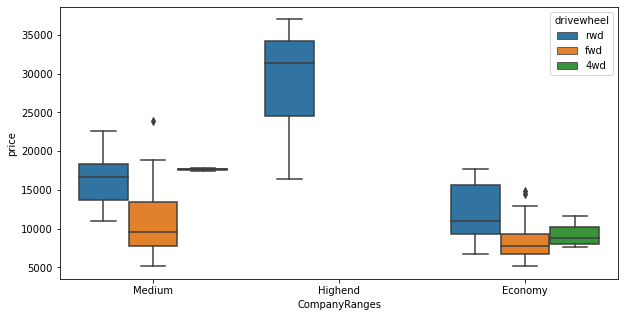

In [50]:
#plotting CompanyRange against price with diffrent colors for drive wheels
plt.figure(figsize = (10,5))
sns.boxplot(x = 'CompanyRanges', y = 'price', hue = 'drivewheel', data = data)
plt.show()

- Highend car has only rwd type drive wheels.

### 3. Data Preparation

we need to handle categorical variable for performing linear regression.

In [51]:
# For variables having only two values, converting these values to 0 and 1
data1 = data.copy()
data['doornumber'] = data['doornumber'].replace({'two' : 1, 'four' : 0})
data['enginelocation'] = data['enginelocation'].replace({'front' : 1, 'rear' : 0})
data['fueltype'] = data['fueltype'].replace({'gas' : 1, 'diesel' : 0})
data['aspiration'] = data['aspiration'].replace({'std' : 1, 'turbo' : 0})
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,fuelEfficiency,CompanyRanges
0,risky,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.70,Medium
1,risky,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.70,Medium
2,moderate,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.15,Medium
3,risky,1,1,0,sedan,fwd,1,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.70,Medium
4,risky,1,1,0,sedan,4wd,1,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.80,Medium


In [52]:
# creating dummy variables for remaining categorical variables
data = pd.get_dummies(data, drop_first = True)
data.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompanyRanges_Highend,CompanyRanges_Medium
0,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,1,0,0,0,1
1,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,1,0,0,0,1
2,1,1,1,1,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,0,0,1,0,0,0,1
3,1,1,0,1,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,1,0,0,0,1
4,1,1,0,1,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,1,0,0,0,1


### 4. Splitting the data into train and test set

In [53]:
from sklearn.model_selection import train_test_split
# 70-30 split for train-test
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Feature scaling

In [54]:
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler to scale all numeric variable in the same scale between o and 1.
scaler = MinMaxScaler()

In [55]:
# Applytin scaler to all the columns except dummy variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','price','fuelEfficiency']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompanyRanges_Highend,CompanyRanges_Medium
1,1,1,1,1,0.068966,0.450407,0.316667,0.083333,0.411171,0.260377,...,0,0,0,0,0,1,0,0,0,1
165,1,1,1,1,0.272414,0.448780,0.308333,0.400000,0.301396,0.139623,...,0,0,0,0,0,1,0,0,0,0
197,1,1,0,1,0.610345,0.775610,0.575000,0.808333,0.602793,0.301887,...,0,0,0,0,0,1,0,0,0,1
169,1,1,1,1,0.406897,0.570732,0.441667,0.350000,0.412335,0.320755,...,0,0,0,0,0,1,0,0,0,0
190,1,1,1,1,0.272414,0.400000,0.308333,0.300000,0.284329,0.181132,...,0,0,0,0,0,1,0,0,0,1


In [56]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompanyRanges_Highend,CompanyRanges_Medium
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.00000,141.000000,141.000000,...,141.000000,141.000000,141.000000,141.000000,141.0,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.886525,0.794326,0.439716,0.985816,0.413402,0.530185,0.462766,0.50461,0.411779,0.240894,...,0.028369,0.333333,0.021277,0.113475,0.0,0.425532,0.042553,0.007092,0.106383,0.468085
std,0.318304,0.405634,0.498122,0.118672,0.198892,0.194656,0.181538,0.20748,0.198452,0.146364,...,0.166616,0.473085,0.144819,0.318304,0.0,0.496186,0.202567,0.084215,0.309426,0.500759
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.409756,0.308333,0.35000,0.254849,0.135849,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.358621,0.518699,0.425000,0.52500,0.359193,0.188679,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.660163,0.550000,0.65000,0.552366,0.301887,...,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing the data into X and Y model building

In [57]:
y_train = df_train.pop('price')
X_train = df_train

### 5. Building the model

- We are using a mixed approach here. First, Recursive Feature Elimination (RFE) using SciKit Learn and then manual feature elimination and statistical analysis using statsmodel.

#### RFE

In [58]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [59]:
# Initialize the linear regression model
lm = LinearRegression()

# Fit the model to the training data
lm.fit(X_train, y_train)

# Initialize the RFE class with the linear regression model and the number of features to be selected
rfe = RFE(lm, n_features_to_select=15)

# Fit the RFE model to the training data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [60]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('fueltype', False, 17),
 ('aspiration', False, 12),
 ('doornumber', False, 19),
 ('enginelocation', True, 1),
 ('wheelbase', False, 7),
 ('carlength', False, 4),
 ('carwidth', True, 1),
 ('carheight', False, 8),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 21),
 ('horsepower', False, 22),
 ('peakrpm', True, 1),
 ('fuelEfficiency', False, 16),
 ('symboling_risky', False, 27),
 ('symboling_safe', False, 29),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 20),
 ('drivewheel_rwd', False, 28),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 5),
 ('enginetype_ohc', False, 30),
 ('enginetype_ohcf', False, 23),
 ('enginetype_ohcv', False, 2),
 ('enginetype_rotor', False, 15),
 ('cylindernumber_five', False, 3),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 11),
 ('cylindernumber_th

In [61]:
# 15 best features
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'peakrpm', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohcv',
       'cylindernumber_four', 'cylindernumber_three', 'CompanyRanges_Highend'],
      dtype='object')

In [62]:
# Elininated features
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'compressionratio', 'horsepower', 'fuelEfficiency',
       'symboling_risky', 'symboling_safe', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_six',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'CompanyRanges_Medium'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [63]:
# Importing required libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
# Function for building the linear model
def build_model(X,y):
    #Adding a constant
    X = sm.add_constant(X)
    #fitting the model
    lm = sm.OLS(y,X).fit()
    #Summary of the model
    print(lm.summary())
    return X, lm

In [65]:
#Function to calculate Variance Inflation Factor (VIF)
def check_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = "VIF", ascending = False)

In [66]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe =  X_train[col]

#### Model 1

In [67]:
X, lm1 = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     171.9
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           9.74e-76
Time:                        10:32:04   Log-Likelihood:                 224.82
No. Observations:                 141   AIC:                            -417.6
Df Residuals:                     125   BIC:                            -370.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

- `enginetype_dohcv` is significant in presence of other variables because its p-value > 0.05 so we will drop this.

In [68]:
X_train1 = X_train_rfe.drop(['enginetype_dohcv'], axis = 1)

#### Model 2

In [69]:
X1, lm2 = build_model(X_train1, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     185.2
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           8.12e-77
Time:                        10:32:04   Log-Likelihood:                 224.66
No. Observations:                 141   AIC:                            -419.3
Df Residuals:                     126   BIC:                            -375.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.32

`boreratio` have p-value > 0.05. So it will also be dropped.

In [70]:
X_train2 = X_train1.drop(['boreratio'], axis = 1)

#### Model 3

In [71]:
X2, lm3 = build_model(X_train2, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     197.1
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           1.84e-77
Time:                        10:32:04   Log-Likelihood:                 223.33
No. Observations:                 141   AIC:                            -418.7
Df Residuals:                     127   BIC:                            -377.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

`enginesize` has p-value > 0.05.

In [72]:
X_train3 = X_train2.drop(['enginesize'], axis = 1)

#### Model 4

In [73]:
X3, lm4 = build_model(X_train3, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     210.6
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           4.58e-78
Time:                        10:32:04   Log-Likelihood:                 221.87
No. Observations:                 141   AIC:                            -417.7
Df Residuals:                     128   BIC:                            -379.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.32

`stroke` has p-value > 0.05.

In [74]:
X_train4 = X_train3.drop(["stroke"], axis = 1)

#### Model 5

In [75]:
X4, lm5 = build_model(X_train4, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     227.3
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           9.26e-79
Time:                        10:32:04   Log-Likelihood:                 220.61
No. Observations:                 141   AIC:                            -417.2
Df Residuals:                     129   BIC:                            -381.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.31

`cylindernumber_three` p-value > 0.05

In [76]:
X_train5 = X_train4.drop(["cylindernumber_three"], axis = 1)

#### Model 6

In [77]:
X5, lm6 = build_model(X_train5, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     246.8
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           2.02e-79
Time:                        10:32:04   Log-Likelihood:                 219.23
No. Observations:                 141   AIC:                            -416.5
Df Residuals:                     130   BIC:                            -384.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.33

**All remaining features seem to be significant as shown by their p-values.** 

In [78]:
# Calculating VIFs
vif = check_VIF(X_train5)
vif

,Features,VIF
0,enginelocation,45.59
1,carwidth,34.66
2,curbweight,27.91
6,carbody_sedan,14.69
5,carbody_hatchback,10.93
8,cylindernumber_four,7.15
3,peakrpm,5.02
7,carbody_wagon,4.69
9,CompanyRanges_Highend,1.97
4,carbody_hardtop,1.72


<AxesSubplot:>

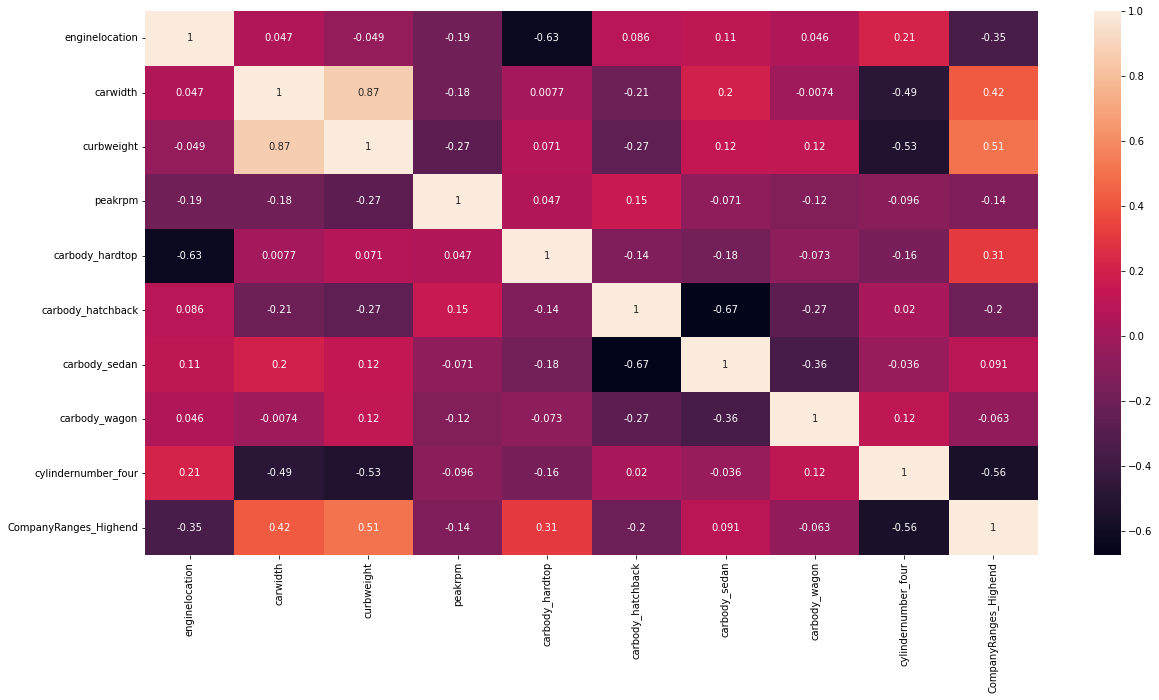

In [79]:
# Plotting correlations
plt.figure(figsize = (20, 10))
sns.heatmap(X_train5.corr(), annot = True)

`enginelocation` has high VIF value showing that it has high multicollinearity. But it might be important from a business perspective. Whereas, we have four features just about carbody. We can drop `carbody_hardtop` as it is highly correlated with `enginelocation`.

In [80]:
X_train6 = X_train5.drop(['carbody_hardtop'], axis = 1)

#### Model7

In [81]:
X6, lm7 = build_model(X_train6, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     254.9
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           1.75e-78
Time:                        10:32:05   Log-Likelihood:                 213.84
No. Observations:                 141   AIC:                            -407.7
Df Residuals:                     131   BIC:                            -378.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

all remaining features seem to be significant as shown by their p-values.

In [82]:
# calculating VIFs
vif = check_VIF(X_train6)
vif

,Features,VIF
0,enginelocation,44.57
1,carwidth,34.56
2,curbweight,27.83
5,carbody_sedan,10.80
4,carbody_hatchback,8.38
7,cylindernumber_four,6.75
3,peakrpm,4.56
6,carbody_wagon,3.68
8,CompanyRanges_Highend,1.81


<AxesSubplot:>

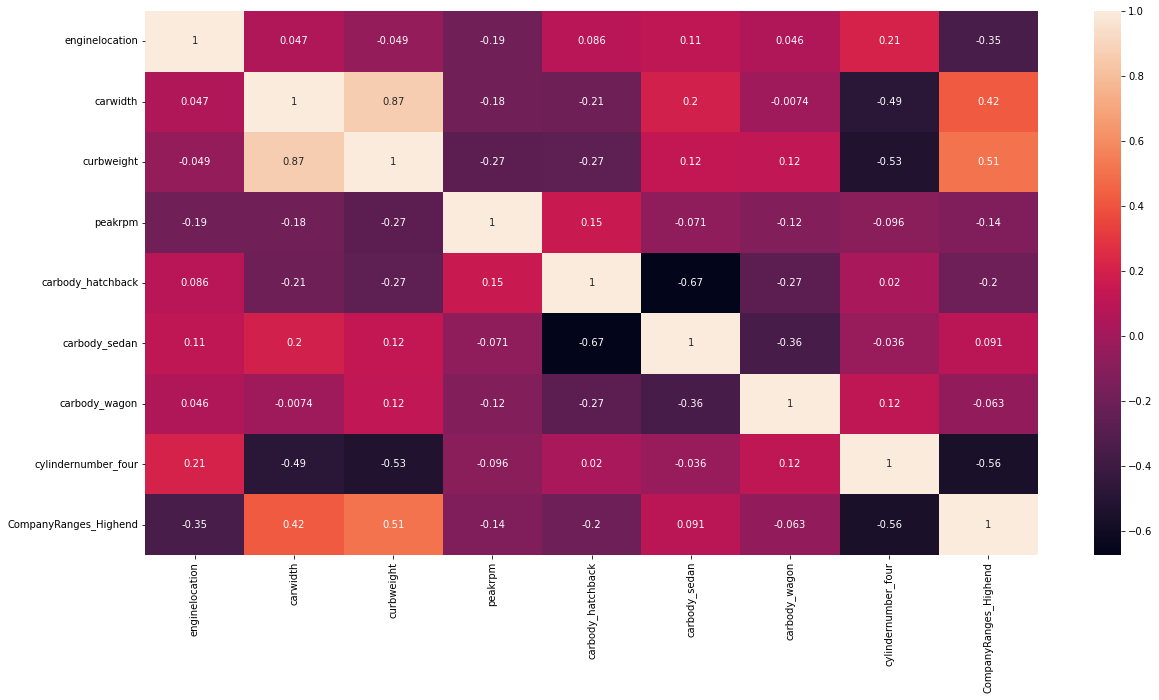

In [83]:
# again plotting correlations
plt.figure(figsize = (20,10))
sns.heatmap(X_train6.corr(), annot = True)

-  Again ` enginelocation` has high VIF but it still important for business prspective so we will remove second higest feature which is `carwidth`.

In [84]:
X_train7 = X_train6.drop(['carwidth'], axis = 1)

#### Model8

In [85]:
X7, lm8 = build_model(X_train7, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     241.8
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           6.15e-75
Time:                        10:32:05   Log-Likelihood:                 202.02
No. Observations:                 141   AIC:                            -386.0
Df Residuals:                     132   BIC:                            -359.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.18

- now `carbody_sydan` is not significant so we will remove it first.
- And R-squared is also decrease to 0.946 to 0.936. still not significant decrease

In [86]:
X_train8 = X_train7.drop(['carbody_sedan'], axis = 1)

#### Model 9

In [87]:
X8, lm9 = build_model(X_train8, y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     269.9
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           2.44e-75
Time:                        10:32:05   Log-Likelihood:                 199.97
No. Observations:                 141   AIC:                            -383.9
Df Residuals:                     133   BIC:                            -360.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

- `carbody_hatchback` is not significant is p-value is greater then 0.05

In [88]:
X_train9 = X_train8.drop(["carbody_hatchback"], axis = 1)

#### Model 10

In [89]:
X9, lm10 = build_model(X_train9, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     310.3
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           5.22e-76
Time:                        10:32:05   Log-Likelihood:                 198.51
No. Observations:                 141   AIC:                            -383.0
Df Residuals:                     134   BIC:                            -362.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

- Again all features are significant

In [90]:
# Calcuting VIFs
vif = check_VIF(X_train9)
vif

,Features,VIF
0,enginelocation,22.56
1,curbweight,8.78
4,cylindernumber_four,6.62
2,peakrpm,4.46
5,CompanyRanges_Highend,1.77
3,carbody_wagon,1.23


<AxesSubplot:>

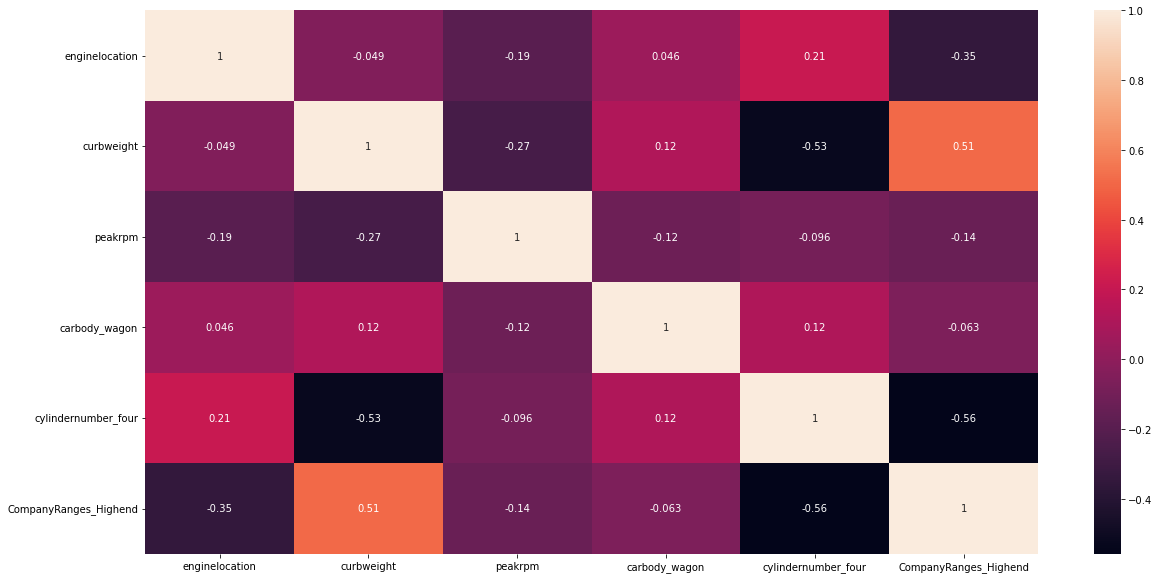

In [91]:
#Plotting correlations
plt.figure(figsize = (20,10))  
sns.heatmap(X_train9.corr(),annot = True)

- We Drop `cylindernumber_four` as `enginelocation` important feature.

In [92]:
X_train10 = X_train9.drop(["cylindernumber_four"], axis = 1)

#### Model 11 

In [93]:
X10, lm11 = build_model(X_train10, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     342.1
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           8.25e-75
Time:                        10:32:06   Log-Likelihood:                 192.47
No. Observations:                 141   AIC:                            -372.9
Df Residuals:                     135   BIC:                            -355.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.09

In [94]:
#Calculating VIFs
vif = check_VIF(X_train10)
vif

,Features,VIF
0,enginelocation,10.65
1,curbweight,7.68
2,peakrpm,4.39
4,CompanyRanges_Highend,1.66
3,carbody_wagon,1.20


<AxesSubplot:>

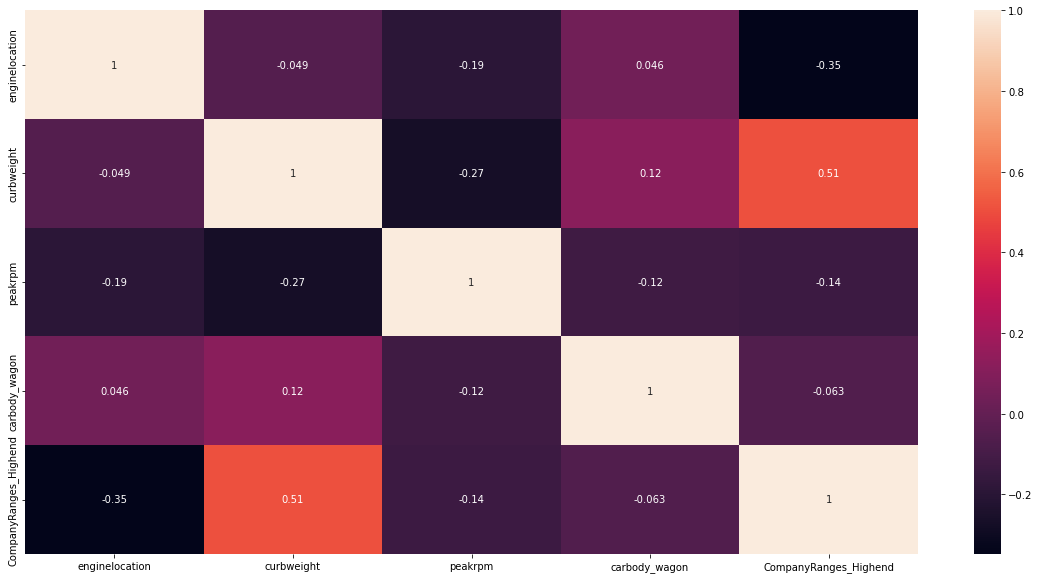

In [95]:
#Plotting correlations
plt.figure(figsize = (20,10))  
sns.heatmap(X_train10.corr(),annot = True)

- VIFs of all remaining features seems to me acceptable. We can use this model as it is or try to to check by removing `enginelocation`.

In [96]:
X_train11 = X_train10.drop(["enginelocation"], axis = 1)

#### Model 12 (Final Model B)

In [97]:
X11, lm12 = build_model(X_train11, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     355.3
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           6.35e-71
Time:                        10:32:06   Log-Likelihood:                 179.97
No. Observations:                 141   AIC:                            -349.9
Df Residuals:                     136   BIC:                            -335.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.17

In [98]:
#Calculating VIFs
vif = check_VIF(X_train11)
vif

,Features,VIF
0,curbweight,3.43
1,peakrpm,2.46
3,CompanyRanges_Highend,1.47
2,carbody_wagon,1.19


- All features have p=value < 0.05 and have low VIFs. No insignificant features or multicollinearity. We can stop here.

### 6. Residual Analysis of the train data

To check if the error terms are also normally distributed (one of the major assumptions of Linear Regression)

For Model A

In [99]:
# Predicating prices for train set based on model

In [100]:
y_train_price = lm11.predict(X10)

Text(0.5, 0, 'Errors')

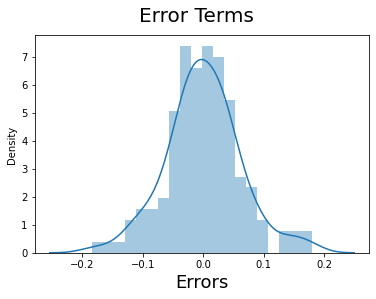

In [101]:
# plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

- The curve is centerd almost around zero and there is very little variance along the tails. Although not a perfect normal distribution, it is close enough.

For Model B

In [102]:
y_train_price = lm12.predict(X11)

Text(0.5, 0, 'Errors')

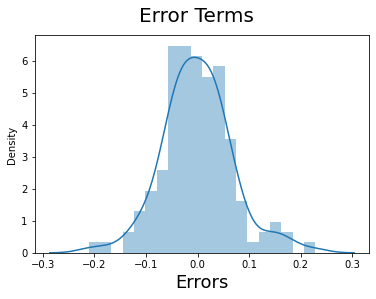

In [103]:
# plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

### 7. Making predictions using final model

#### Applying scaling on the test sets

In [104]:
# Transforming numerical variables in the test set
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [105]:
y_test = df_test.pop('price')
X_test = df_test

#### Predicting using Model A

In [106]:
# Dropping unnecessary variables
X_test_new = X_test[X_train10.columns]

# Adding a constant
X_test_new = sm.add_constant(X_test_new)

In [107]:
# Predicting prices
y_pred_A = lm11.predict(X_test_new)

#### Predicting using Model B

In [110]:
#Dropping unnecessary variables
X_test_new = X_test[X_train11.columns]

#Adding a constant
X_test_new = sm.add_constant(X_test_new)


In [111]:
#Predicting prices
y_pred_B = lm12.predict(X_test_new)

### 8. Model evaluation

In [112]:
# Importing required libraries for model evaluation
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

#### For model A

Text(0, 0.5, 'y_pred')

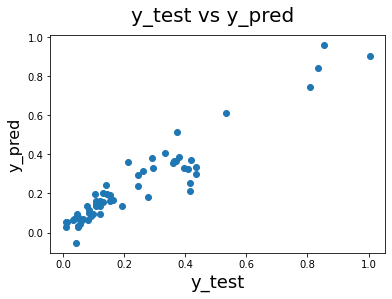

In [114]:
# Plotting y_test vs y_pred
fig = plt.figure()
plt.scatter(y_test, y_pred_A)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

- y_test VS y_pred seems to be almost linear with little variation.

In [115]:
# Calculating RMSE and r2 score
rmse = sqrt(mean_squared_error(y_test, y_pred_A))
print("Model RMSE:", rmse)

r2 = r2_score(y_test, y_pred_A)
print('Model r2_score:', r2)

Model RMSE: 0.0679851932334445
Model r2_score: 0.9039716256522066


- **R-squared score on the test set = 0.903**
- 90% of the variabce in the test set is explained by the model.
- r2_score on the test data is very close to the trained Adj.RSquared value of the model. Model A has a significantly high r2_score and a low RMSE of 0.068.

#### For Model B

Text(0, 0.5, 'y_pred')

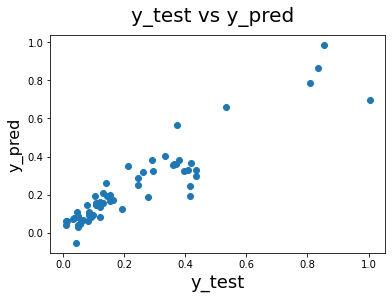

In [116]:
# Plotting y_test vs y_pred
fig = plt.figure()
plt.scatter(y_test, y_pred_B)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

- Again it is almost linear with little variation.


In [117]:
# Calculating RMSE and r2 score
rmse = sqrt(mean_squared_error(y_test, y_pred_B))
print('Model RMSE:', rmse)

r2 = r2_score(y_test, y_pred_B)
print('Model r2_score:', r2)

Model RMSE: 0.08246415426560431
Model r2_score: 0.8587132865529181


- r2_score on the data is not very close to the trained Adj.R-Squared value of the model.

#### Comparing two models

| Model | Adj.R_Squared | Prob(F-statistic) | AIC | BIC | r2_score(test set) | RMSE(test set) |
| --- | --- | --- | --- | --- | --- | --- |
| Model A | 0.924 | 8.25e-75 | -372.9 | -355.2 | 0.903 | 0.067 |
| Model B | 0.910 | 6.35e-71 | -349.9 | -355.2 | 0.858 | 0.082 |

Model B is sompromisign in the overall model fit parameters. Therefore considering the overall fit of the model, it is better to select Model A with better r2_score and RMSE.

### Final inferences

- Final model has low p-values and low VIFs, indicating that the variables are able to explain the price of the automobiles to a good extent.

Final predictors which can be proposed are:

| Predictor | Coef | p-value |
| --- | --- | --- |
| enginelocation | -0.2557 | 0.000 |
| curbweight | 0.7865 | 0.000 |
| peakrpm | 0.1562 | 0.00 |
| carbody_wagon | -0.0731 | 0.000 |
| CompanyRange_Highend | 0.2957 | 0.000 |

We can see that the equation of our best fitted line is:

**$ price = 0.0925 - 0.2557 \times enginelocation + 0.7865 \times curbweight + 0.1562 \times peakrpm - 0.0731 \times carbody\_wagon + 0.2957 \times CompanyRange \_Highend $**

The above equation tells us how the price of an automobile varies with one unit change in any of the given independent variables provided all other independent variables remain constant. We can interpret this for all the present variables as:

- One unit change in curb weight will change the price of the car by 0.7865 provided other features do not change. We already saw the positive correlation between curb weight and price in data visualization.
- Similarly, one unit change in peak rpm will change the price of the car by 0.1562 provided other features are same.
- Company name also matters. As we created a derived variable for companies, the equation tells us that the companies having mean prices higher than 20000 have essential role in determining price of the car. It increases the price by a factor of 0.2957.
- The front engine location is the most commonly available feature in 98.5% of the cars in the given data. We saw while visualising the data that the cars having rear engines are priced higher than those having front engine. Since, front engine location is attributed with relatively low car prices, the coefficient for this variable is negative i.e. -0.2557.
- Similarly, car body wagon is attributed with relatively low prices. Hence, coefficient for this variable is negative i.e. -0.0731. It suggests that the presence of wagon car body decreases the price by a factor of 0.0731.

|**Adj.R-Squared** | **r2_score** | **Prob(F-statistic)** | **AIC** | **BIC** | **RMSE** |
| ---- | ---- | ---- | ---- | ---- | ---- |
| 0.924 | 0.903 | 8.25e-75 | -372.9 | -355.2 | 0.067 |

Overall it is a good model, but we could still do better. Some of the ways to improve the model can be:

- To derive new more useful features (For example, instead of using carlength and carwidth which are correlated, we can use their ratio as a new variable)
- To experiment with different variables and check various model fit parameters as well as try to get a more normal distribution of error terms
- To experiment with different models such as non-linear ones which could be more robust and could better fit the data

#### Suggestions:

Based on the given data, following suggestions can be made to the Chinese automobile company Geely Auto to compete with their US and European counterparts:


- From the derived equation obtained from Linear Regression model, the company can understand which features are importatnt in deciding the price of the cars and how significant thier impact on the price is. This can be understood from the explanation given above for the equation. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, pricing dynamics of the new market can be understood from the model.

- We got some useful insights while understanding and visualizing the data which will be useful for the company:

   1. **Average car price** in USA is approximately **13000 USD**. Geely Auto should keep this in mind for optimal profit and effective price determination
   
   2. Geely Autos should also take note of most predominat features in the cars in USA. This will help them in understanding the market and demand from the consumers. The company can also take this into consideration while designing new cars and improving existing ones.

        - **Symboling** (assigned insurance risk rating): moderate(0,1)
        - **Fuel type**: gas
        - **Aspiration used**: standard
        - **Number of doors**: four
        - **Body of car**: sedan
        - **Type of drive wheel**: forward
        - **Location of car engine**: front
        - **Type of engine**: ohc
        - **Cylinder number**: four
        - **Fuel system**: mpfi
        - From the company names, we can see that the **Toyota** is the most popular one, implying it will be the biggest competitor in the market. Geely Automotives can plan their strategies accordidngly.
